In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# importing data

In [161]:
df = pd.read_csv("heart_disease_uci_modified.csv")

In [162]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2.0
2,3.0,67.0,mALE,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0.0


In [163]:
df.shape

(920, 13)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        820 non-null    float64
 1   age       820 non-null    float64
 2   sex       820 non-null    object 
 3   dataset   820 non-null    object 
 4   cp        820 non-null    object 
 5   trestbps  787 non-null    object 
 6   chol      796 non-null    float64
 7   fbs       743 non-null    object 
 8   restecg   819 non-null    object 
 9   thalch    769 non-null    float64
 10  exang     769 non-null    object 
 11  oldpeak   762 non-null    float64
 12  num       820 non-null    float64
dtypes: float64(6), object(7)
memory usage: 93.6+ KB


In [165]:
df.describe()

,id,age,chol,thalch,oldpeak,num
count,820.000000,820.000000,796.000000,769.000000,762.000000,820.000000
mean,466.103659,74.836585,199.536432,137.465540,0.880052,0.997561
std,265.182846,62.284158,110.870495,26.424601,1.089815,1.139798
min,1.000000,28.000000,0.000000,63.000000,-2.600000,0.000000
25%,237.750000,48.000000,175.000000,119.000000,0.000000,0.000000
50%,471.500000,56.000000,224.000000,140.000000,0.500000,1.000000
75%,698.250000,63.000000,268.250000,158.000000,1.500000,2.000000
max,920.000000,297.000000,603.000000,202.000000,6.200000,4.000000


In [166]:
df.isna().sum()

id          100
age         100
sex         100
dataset     100
cp          100
trestbps    133
chol        124
fbs         177
restecg     101
thalch      151
exang       151
oldpeak     158
num         100
dtype: int64

In [167]:
df.duplicated().sum()

np.int64(96)

In [168]:
df.drop_duplicates(inplace=True)

In [169]:
df.dropna(inplace=True)

In [170]:
df.shape

(664, 13)

In [171]:
df["sex"].unique()

array(['Male', 'mALE', 'Female', 'FeMALE'], dtype=object)

In [172]:
df["sex"] = df["sex"].str.lower()

In [173]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [174]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [175]:
df["cp"] = df["cp"].map({'non-anginal':0,'asymptomatic':1,'typical angina':2,'atypical angina':3})

In [176]:
df["restecg"].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [177]:
df["restecg"] = df["restecg"].astype('category')
df["sex"] = df["sex"].astype('category')
df["dataset"] = df["dataset"].astype('category')
df["fbs"] = df["fbs"].astype('category')
df["exang"] = df["exang"].astype('category')

In [178]:
df["restecg"] = df["restecg"].cat.codes
df["sex"] = df["sex"].cat.codes
df["dataset"] = df["dataset"].cat.codes
df["fbs"] = df["fbs"].cat.codes
df["exang"] = df["exang"].cat.codes

In [179]:
df['trestbps'].nunique()

107

In [180]:
def valide_number(string):
    number = ''
    for caracter in string:
        if '0'<= caracter <= '9' or caracter == '.':
            number += caracter
    return number

df['trestbps'] = df['trestbps'].agg(valide_number)
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')

/var/folders/cc/x70s24gx40zg_y7gzcpvs4400000gn/T/ipykernel_5195/1795595499.py:8: FutureWarning: using <function valide_number at 0x120e17c10> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['trestbps'] = df['trestbps'].agg(valide_number)


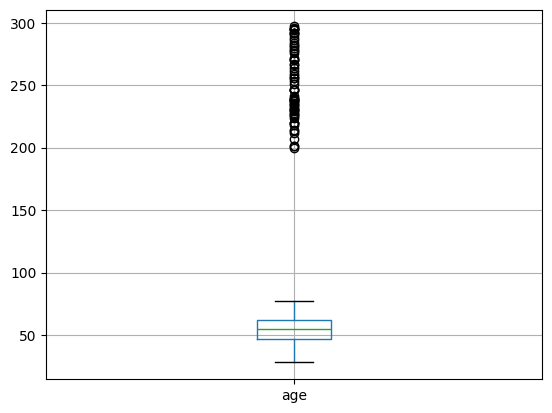

In [181]:
df[['age']].boxplot()
plt.show()

In [182]:
df = df[df['age']<100]
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63.0,1,0,2,145.0,233.0,1,0,150.0,0,2.3,0.0
1,2.0,67.0,1,0,1,160.0,286.0,0,0,108.0,1,1.5,2.0
2,3.0,67.0,1,0,1,120.0,229.0,0,0,129.0,1,2.6,1.0
3,4.0,37.0,1,0,0,130.0,250.0,0,1,187.0,0,3.5,0.0
4,5.0,41.0,0,0,3,130.0,204.0,0,0,172.0,0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912.0,62.0,1,3,1,160.0,254.0,1,2,108.0,1,3.0,4.0
914,915.0,46.0,1,3,1,134.0,310.0,0,1,126.0,0,0.0,2.0
915,916.0,54.0,0,3,1,127.0,333.0,1,2,154.0,0,0.0,1.0
917,918.0,55.0,1,3,1,122.0,223.0,1,2,100.0,0,0.0,2.0


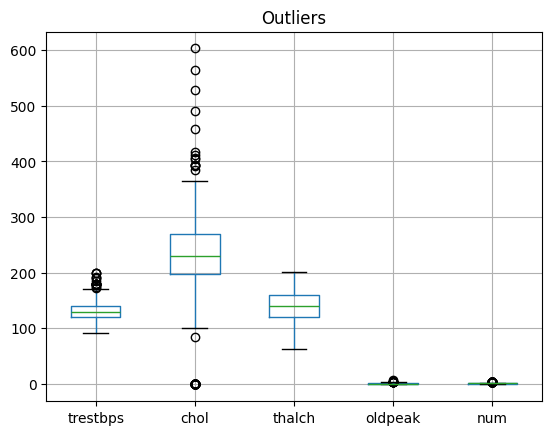

In [183]:
column = df[["trestbps","chol","thalch","oldpeak","num"]]

column.boxplot()
plt.title("Outliers")
plt.show()

In [184]:
df = df[(df['chol']>100) & (df['chol']<450)]
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1.0,63.0,1,0,2,145.0,233.0,1,0,150.0,0,2.3,0.0
1,2.0,67.0,1,0,1,160.0,286.0,0,0,108.0,1,1.5,2.0
2,3.0,67.0,1,0,1,120.0,229.0,0,0,129.0,1,2.6,1.0
3,4.0,37.0,1,0,0,130.0,250.0,0,1,187.0,0,3.5,0.0
4,5.0,41.0,0,0,3,130.0,204.0,0,0,172.0,0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912.0,62.0,1,3,1,160.0,254.0,1,2,108.0,1,3.0,4.0
914,915.0,46.0,1,3,1,134.0,310.0,0,1,126.0,0,0.0,2.0
915,916.0,54.0,0,3,1,127.0,333.0,1,2,154.0,0,0.0,1.0
917,918.0,55.0,1,3,1,122.0,223.0,1,2,100.0,0,0.0,2.0


# Data visualization

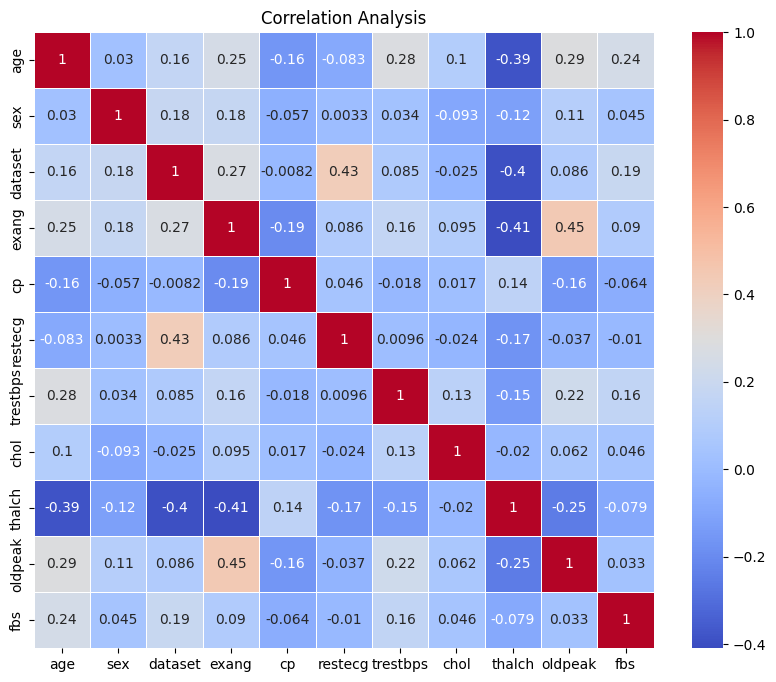

In [185]:
column = ["age",'sex',"dataset","exang",'cp','restecg',"trestbps","chol","thalch","oldpeak","fbs"]
corr = df[column].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

<Figure size 1000x600 with 0 Axes>

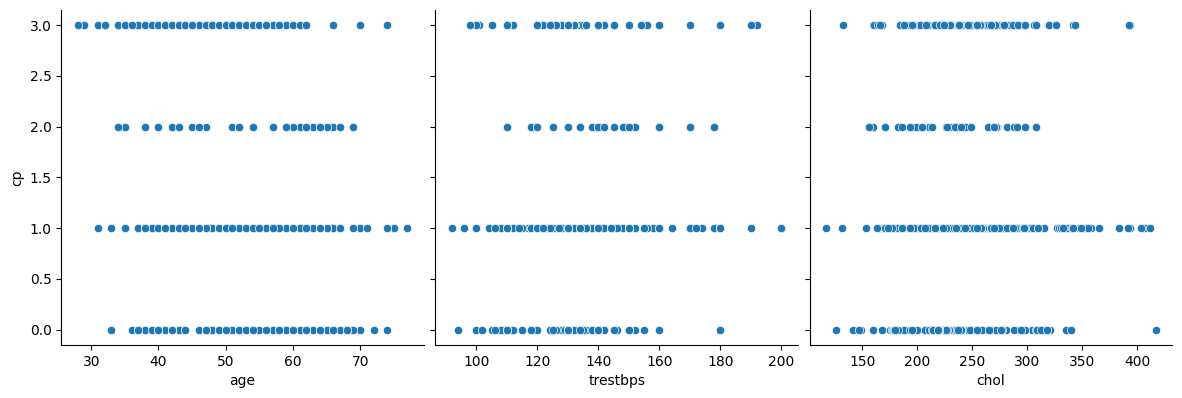

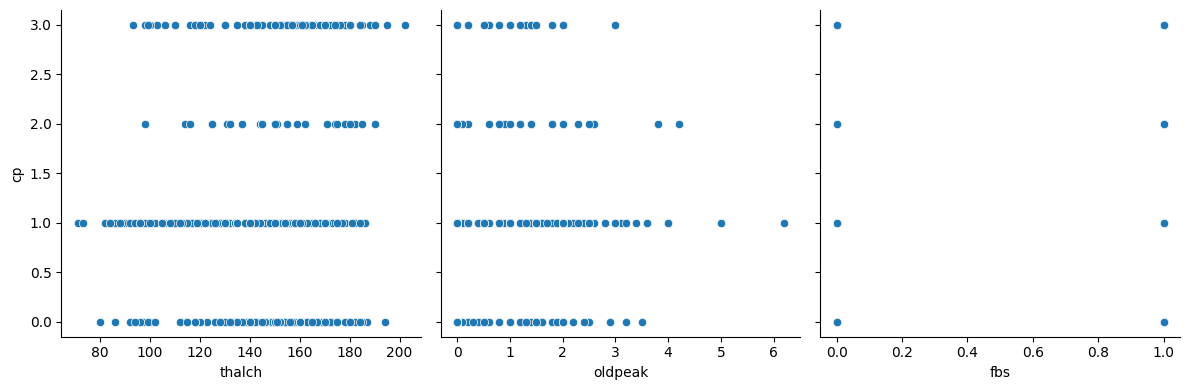

In [186]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=["age","trestbps","chol"], y_vars='cp', height=4, aspect=1, kind='scatter')
sns.pairplot(df, x_vars=["thalch","oldpeak","fbs"], y_vars='cp', height=4, aspect=1, kind='scatter')

plt.tight_layout()
plt.show()

# Fitting models

In [187]:
X = df.drop(columns=["id","cp"])
y = df['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [188]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [189]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [190]:
rf = RandomForestClassifier(random_state=42)

gb = GradientBoostingClassifier(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=42)

dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=0.06, random_state=42) 

kn = KNeighborsClassifier(n_neighbors=10)

log = LogisticRegression(random_state=42)

In [191]:
models = [('Logistic Regressionr', log), ('KNeighbors Classifier', kn),('Random Forest Classifier', rf),('Decision Tree Classifier', dt), ('Gradient Boosting Classifier', gb)]

accuracy = {}

for name,model in models:
    accuracy[name] = evaluate_model(model, X_train, X_test, y_train, y_test)


accuracy

{'Logistic Regressionr': 0.6442307692307693,
 'KNeighbors Classifier': 0.5576923076923077,
 'Random Forest Classifier': 0.5865384615384616,
 'Decision Tree Classifier': 0.6538461538461539,
 'Gradient Boosting Classifier': 0.5865384615384616}

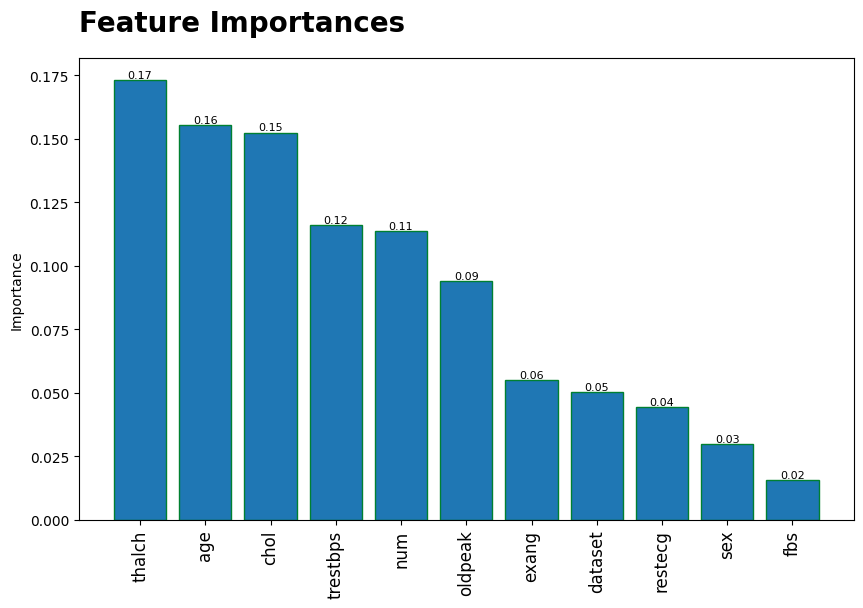

In [192]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
bars = plt.bar(range(X.shape[1]), importances[indices], edgecolor="#008031", linewidth=1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", size=8)

plt.title("Feature Importances", size=20, loc="left", y=1.04, weight="bold")
plt.ylabel("Importance")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90, size=12)
plt.show()

In [193]:
X = df[['thalch','age','chol','trestbps','num','oldpeak']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [194]:

evaluate_model(dt, X_train, X_test, y_train, y_test)

0.6474358974358975

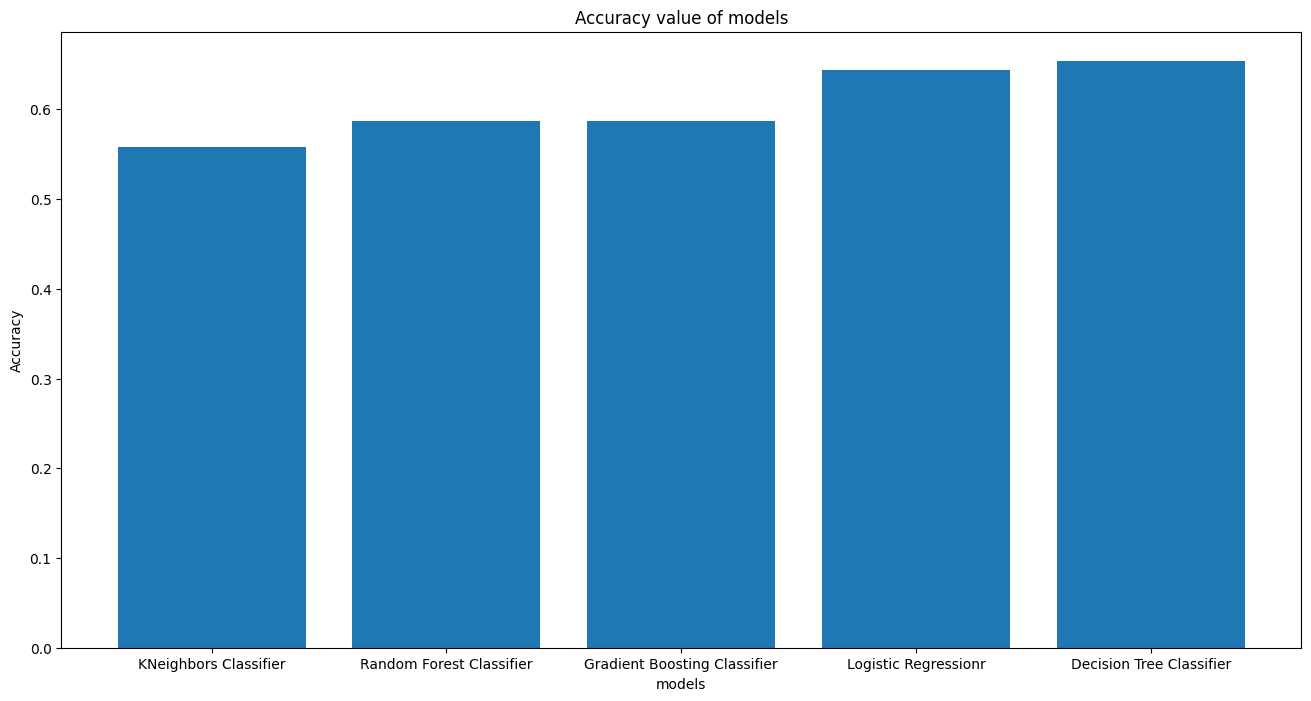

In [199]:
data = dict(sorted(accuracy.items(), key=lambda key_val: key_val[1]))

names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(16, 8))
plt.title('Accuracy value of models')
plt.xlabel("models")
plt.ylabel('Accuracy')
plt.bar(range(len(data)), values, tick_label=names)
plt.show()

### The best model is Decision Tree Regression with accuracy = 64%